In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 합성에 사용할 이미지 읽기, 전경 이미지는 4채널 png 파일
img_fg = cv2.imread('./img/opencv_logo.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('./img/girl.jpg')

In [16]:
# 알파 채널을 이용해서 마스크와 역마스크 생성
_, mask = cv2.threshold(img_fg[:, :, 3], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

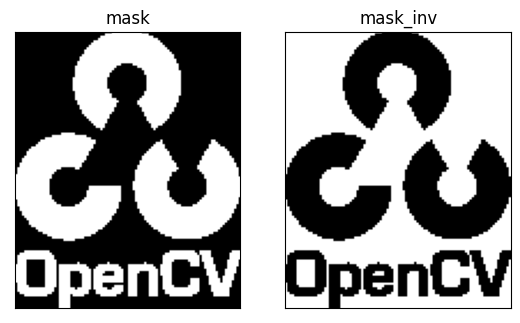

In [17]:
plt.subplot(1, 2, 1)
plt.title('mask')
plt.imshow(mask, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title('mask_inv')
plt.imshow(mask_inv, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()

In [18]:
print(img_fg.shape)

(120, 98, 4)


In [21]:
# 전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
print(img_fg.shape)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w]

(120, 98, 3)


In [22]:
# 마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

In [23]:
# 이미지 합성
added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

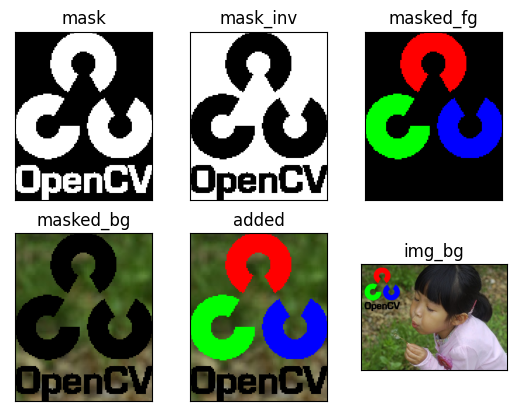

In [28]:
# 이미지 출력해서 확인하기
use_window = False

if use_window:
    cv2.imshow('mask', mask)
    cv2.imshow('mask_inv', mask_inv)
    cv2.imshow('mask_fg', masked_fg)
    cv2.imshow('masked_bg', masked_bg)
    cv2.imshow('added', added)
    cv2.imshow('result', img_bg)
    cv2.waitKey()
    cv2.destroyAllWindows()
else:
    imgs = {'mask':mask, 'mask_inv':mask_inv, 'masked_fg':masked_fg, 
            'masked_bg':masked_bg, 'added':added, 'img_bg':img_bg} 
    for i, (k, v) in enumerate(imgs.items()):
        plt.subplot(2, 3, i+1)
        plt.title(k)
        if len(v.shape) == 2:
            plt.imshow(v, cmap='gray')
        else:
            plt.imshow(v[:,:,::-1])
        plt.xticks([])
        plt.yticks([])
    plt.show()